In [5]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA

In [6]:


# 配置路径
data_folder = "5min_smoothed_data/"   # EEG 数据文件夹
outcome_file = "valid_patients_outcome.csv"  # 患者标签文件

# 读取 outcome.csv 作为字典 {patient_id: outcome}
outcome_df = pd.read_csv(outcome_file)
outcome_dict = outcome_df.set_index('pat_ID')['outcome'].to_dict()

# 存储最终的数据
all_data = []

# 遍历数据文件夹中的 CSV 文件
for file in os.listdir(data_folder):
    if not file.endswith(".csv"):
        continue  # 跳过非 CSV 文件

    file_path = os.path.join(data_folder, file)
    patient_id = file.split(".")[0]  # 提取病人 ID

    # 仅处理有 label 的数据
    if patient_id not in outcome_dict:
        continue  

    # 读取 CSV 文件
    df = pd.read_csv(file_path)

    # 计算当前数据点在文件中的百分比位置
    df["row_percent"] = df.index / len(df)  # 行号 / 总行数

    # 添加病人 ID 和标签
    df["patient_id"] = patient_id
    df["outcome"] = outcome_dict[patient_id]  # Good / Bad Outcome

    # 存储到列表
    all_data.append(df)

# 合并所有数据
df_all = pd.concat(all_data, ignore_index=True)

# 显示前 5 行数据
print(df_all.head())

        BCI       BSAR       SIQ  SIQ_alpha  SIQ_beta  SIQ_delta  SIQ_theta  \
0  0.488738  12.234458  3.360156   3.413112  2.576016   4.669621   4.302477   
1  0.877981  12.598372  4.166291   4.127452  3.556138   5.103504   4.893056   
2  0.670806  10.161358  3.492942   3.595498  2.604873   4.875688   4.684818   
3  0.734017  37.600685  3.670869   3.943849  2.865051   4.870854   4.734616   
4  0.698913  10.142852  3.695669   3.845726  2.759723   5.111294   4.974590   

    SignalSD  alphakurtosis  alphameanrat  ...  Prob Seizure      Prob LPD  \
0  21.570299       3.819692      0.068106  ...      0.000029  1.707202e-05   
1  44.093983       3.838296      0.092034  ...      0.419973  2.593133e-07   
2  18.379980       4.894569      0.073193  ...      0.000044  1.609337e-03   
3  57.290771       3.496956      0.021776  ...      0.001306  2.436724e-04   
4  43.115307       3.253203      0.040584  ...      0.001399  2.577283e-04   

   Prob GPD     Prob LRDA     Prob GRDA  rosc_sec  GPD_b

✅ SVM Classification Accuracy: 0.9679

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     15421
           1       0.93      0.75      0.83      1813

    accuracy                           0.97     17234
   macro avg       0.95      0.87      0.91     17234
weighted avg       0.97      0.97      0.97     17234



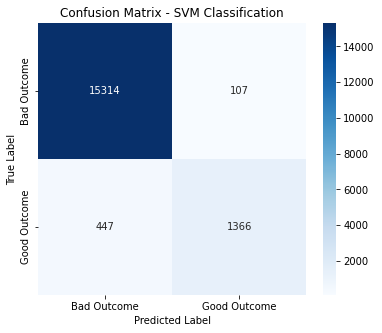

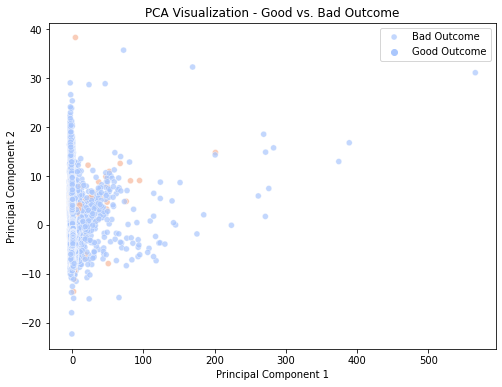

In [8]:
# Keep only numerical features
features = df_all.columns.difference(["row_percent", "patient_id", "outcome"])
X = df_all[features].fillna(df_all[features].mean())  # Fill NaN
y = df_all["outcome"].map({"Good Outcome": 1, "Bad Outcome": 0})  # Convert labels

# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Train SVM classifier
svm_model = SVC(kernel="rbf", C=1, gamma="scale")
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Print accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ SVM Classification Accuracy: {accuracy:.4f}")
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues",
            xticklabels=["Bad Outcome", "Good Outcome"],
            yticklabels=["Bad Outcome", "Good Outcome"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - SVM Classification")
plt.show()



✅ SVM Accuracy (First 50%): 0.9648

📊 Classification Report (First 50%):
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      7747
           1       0.93      0.72      0.81       915

    accuracy                           0.96      8662
   macro avg       0.95      0.86      0.90      8662
weighted avg       0.96      0.96      0.96      8662



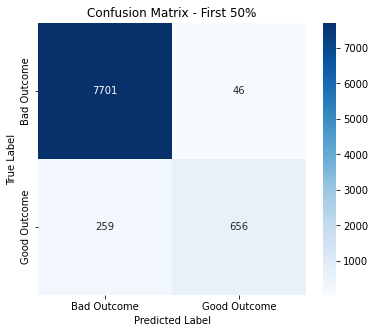

✅ SVM Accuracy (Last 50%): 0.9677

📊 Classification Report (Last 50%):
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      7673
           1       0.93      0.75      0.83       899

    accuracy                           0.97      8572
   macro avg       0.95      0.87      0.91      8572
weighted avg       0.97      0.97      0.97      8572



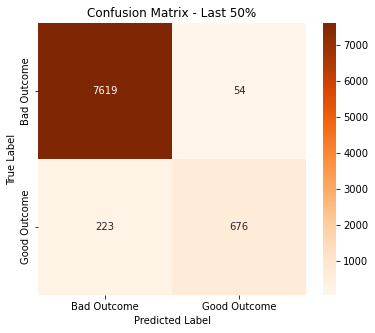

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# File paths
data_folder = "5min_smoothed_data/"
outcome_file = "valid_patients_outcome.csv"

# Load outcome labels
outcome_df = pd.read_csv(outcome_file)
outcome_dict = outcome_df.set_index('pat_ID')['outcome'].to_dict()

# Store all data
all_data = []

# Iterate through data files
for file in os.listdir(data_folder):
    if not file.endswith(".csv"):
        continue

    file_path = os.path.join(data_folder, file)
    patient_id = file.split(".")[0]

    # Only process labeled data
    if patient_id not in outcome_dict:
        continue  

    # Load CSV
    df = pd.read_csv(file_path)

    # Compute row percentage (position in file)
    df["row_percent"] = df.index / len(df)

    # Add patient_id and outcome
    df["patient_id"] = patient_id
    df["outcome"] = outcome_dict[patient_id]

    all_data.append(df)

# Merge all data
df_all = pd.concat(all_data, ignore_index=True)

# Keep only numerical features
features = df_all.columns.difference(["row_percent", "patient_id", "outcome"])
X = df_all[features].fillna(df_all[features].mean())  # Fill NaN
y = df_all["outcome"].map({"Good Outcome": 1, "Bad Outcome": 0})  # Convert labels

# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split first 50% and last 50%
X_first_half = X_scaled[df_all["row_percent"] <= 0.5]
y_first_half = y[df_all["row_percent"] <= 0.5]

X_last_half = X_scaled[df_all["row_percent"] > 0.5]
y_last_half = y[df_all["row_percent"] > 0.5]

# Train-test split for each half
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_first_half, y_first_half, test_size=0.2, random_state=42, stratify=y_first_half)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_last_half, y_last_half, test_size=0.2, random_state=42, stratify=y_last_half)

# Train SVM classifier on first 50%
svm_model1 = SVC(kernel="rbf", C=1, gamma="scale")
svm_model1.fit(X_train1, y_train1)
y_pred1 = svm_model1.predict(X_test1)

# Train SVM classifier on last 50%
svm_model2 = SVC(kernel="rbf", C=1, gamma="scale")
svm_model2.fit(X_train2, y_train2)
y_pred2 = svm_model2.predict(X_test2)

# Evaluate model 1 (first 50%)
accuracy1 = accuracy_score(y_test1, y_pred1)
print(f"✅ SVM Accuracy (First 50%): {accuracy1:.4f}")
print("\n📊 Classification Report (First 50%):\n", classification_report(y_test1, y_pred1))

plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test1, y_pred1), annot=True, fmt="d", cmap="Blues",
            xticklabels=["Bad Outcome", "Good Outcome"],
            yticklabels=["Bad Outcome", "Good Outcome"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - First 50%")
plt.show()

# Evaluate model 2 (last 50%)
accuracy2 = accuracy_score(y_test2, y_pred2)
print(f"✅ SVM Accuracy (Last 50%): {accuracy2:.4f}")
print("\n📊 Classification Report (Last 50%):\n", classification_report(y_test2, y_pred2))

plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test2, y_pred2), annot=True, fmt="d", cmap="Oranges",
            xticklabels=["Bad Outcome", "Good Outcome"],
            yticklabels=["Bad Outcome", "Good Outcome"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Last 50%")
plt.show()

✅ SVM Classification Accuracy (with random labels): 0.4970

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.52      0.51      8636
           1       0.50      0.48      0.49      8598

    accuracy                           0.50     17234
   macro avg       0.50      0.50      0.50     17234
weighted avg       0.50      0.50      0.50     17234



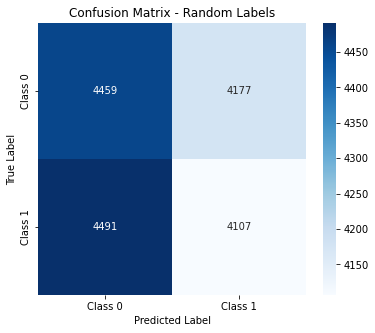

In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA

# File paths
data_folder = "5min_smoothed_data/"
outcome_file = "valid_patients_outcome.csv"

# Load outcome labels (but we will ignore them)
outcome_df = pd.read_csv(outcome_file)
outcome_dict = outcome_df.set_index('pat_ID')['outcome'].to_dict()

# Store all data
all_data = []

# Iterate through data files
for file in os.listdir(data_folder):
    if not file.endswith(".csv"):
        continue

    file_path = os.path.join(data_folder, file)
    patient_id = file.split(".")[0]

    # Only process labeled data (but we ignore actual labels)
    if patient_id not in outcome_dict:
        continue  

    # Load CSV
    df = pd.read_csv(file_path)

    # Compute row percentage (position in file)
    df["row_percent"] = df.index / len(df)

    # Add patient_id and outcome (but we ignore real outcome)
    df["patient_id"] = patient_id
    df["outcome"] = np.random.choice([0, 1], size=len(df))  # Random labels

    all_data.append(df)

# Merge all data
df_all = pd.concat(all_data, ignore_index=True)

# Keep only numerical features
features = df_all.columns.difference(["row_percent", "patient_id", "outcome"])
X = df_all[features].fillna(df_all[features].mean())  # Fill NaN
y = df_all["outcome"]  # Use randomly assigned labels

# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Train SVM classifier
svm_model = SVC(kernel="rbf", C=1, gamma="scale")
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Print accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ SVM Classification Accuracy (with random labels): {accuracy:.4f}")
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues",
            xticklabels=["Class 0", "Class 1"],
            yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Random Labels")
plt.show()